# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$.

In [5]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.

    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy.
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.

    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    # ... ENTER YOUR CODE HERE ...
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    x = x0
    niter = 0
    while True:
        fx = f(x)
        fpx = fder(x)
        x_new = x - fx / fpx
        if abs(x_new - x) < eps:
            return x_new, niter
        x = x_new
        niter += 1
        if niter >= maxiter:
            print("Maximum number of iterations exceeded.")
            return None, None

### Test I.1

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [12]:
# ... ENTER YOUR CODE HERE ...
# Define the function f(x) and its derivative f'(x)
def f(x):
    return x**2 - 1

def fder(x):
    return 2*x

# Set initial guess and desired absolute accuracy
initial_guess = 2.0
accuracy = 1e-6

# Call the newton_iteration function
root, iterations = newton_iteration(f, fder, initial_guess, accuracy)

# Print the results
print("Root found:", root)
print("Number of iterations:", iterations)

Root found: 1.000000000000001
Number of iterations: 4


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [13]:
# ... ENTER YOUR CODE HERE ...
def modified_newton_iteration(f, fder, x0, m, eps=1e-5, maxiter=1000):
    x = x0
    niter = 0
    while True:
        fx = f(x)
        fpx = fder(x)
        if fpx == 0:
            print(f"For m={m}, the derivative became zero. Unable to continue iteration.")
            return None, None
        x_new = x - m * fx / fpx
        if abs(x_new - x) < eps:
            return x_new, niter
        x = x_new
        niter += 1
        if niter >= maxiter:
            print(f"For m={m}, the maximum number of iterations exceeded.")
            return None, None
# Define the function f(x) and its derivative f'(x)
def f(x):
    return (x**2 - 1)**2

def fder(x):
    return 4 * x * (x**2 - 1)

# Set initial guess and desired absolute accuracy
initial_guess = 2.0
accuracy = 1e-6

# Define the values of m to test
m_values = [1, 2, 3, 4, 5]

# Apply modified Newton's iteration for each value of m
for m in m_values:
    root, iterations = modified_newton_iteration(f, fder, initial_guess, m, accuracy)
    if root is None:
        print(f"For m={m}, unable to find the root within the maximum number of iterations.")
    else:
        print(f"For m={m}, root found: {root}, number of iterations: {iterations}")

For m=1, root found: 1.000000978713871, number of iterations: 20
For m=2, root found: 1.000000000000001, number of iterations: 4
For m=3, root found: 1.0000002676490465, number of iterations: 19
For m=4, the maximum number of iterations exceeded.
For m=4, unable to find the root within the maximum number of iterations.
For m=5, the maximum number of iterations exceeded.
For m=5, unable to find the root within the maximum number of iterations.


# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

Root found: 0.6417148575131004
Number of iterations: 291


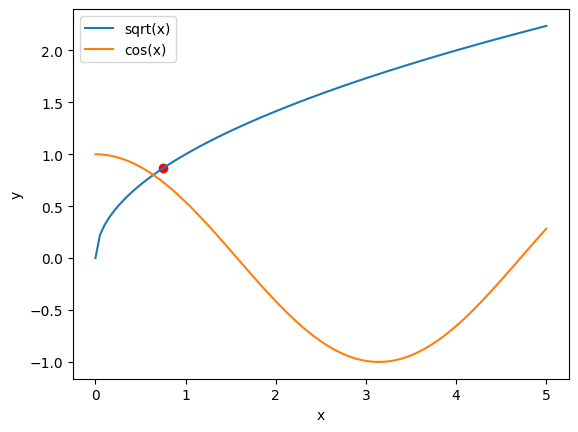

In [17]:
# ... ENTER YOUR CODE HERE ...
import numpy as np
def fixed_point_iteration(f, x0, eps=1e-6, maxiter=1000):
    x = x0
    niter = 0
    while True:
        x_new = f(x)
        if abs(x_new - x) < eps:
            return x_new, niter
        x = x_new
        niter += 1
        if niter >= maxiter:
            print("Maximum number of iterations exceeded.")
            return None, None
# Define the function f(x) for fixed-point iteration
def f(x):
    return np.cos(x)**2

# Set initial guess and desired absolute accuracy
initial_guess = 0.75
accuracy = 1e-6

# Call the fixed-point iteration function
root, iterations = fixed_point_iteration(f, initial_guess, accuracy)

# Print the result
print("Root found:", root)
print("Number of iterations:", iterations)
import numpy as np
import matplotlib.pyplot as plt

#For plotting f(x)
# Define the functions
def f(x):
    return np.sqrt(x)

def g(x):
    return np.cos(x)

# Generate x values
x = np.linspace(0, 5, 100)

# Evaluate the functions at x values
y1 = f(x)
y2 = g(x)

# Plot the functions
plt.plot(x, y1, label='sqrt(x)')
plt.plot(x, y2, label='cos(x)')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Find the approximate root by visual inspection
root_estimate = 0.75

# Mark the approximate root on the plot
plt.scatter(root_estimate, f(root_estimate), color='red', label='Approximate Root')

# Show the plot
plt.show()

# Part III. Newton's fractal.

(Not graded).

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points.
Color the grid in three colors, according to the root, to which iterations converged.

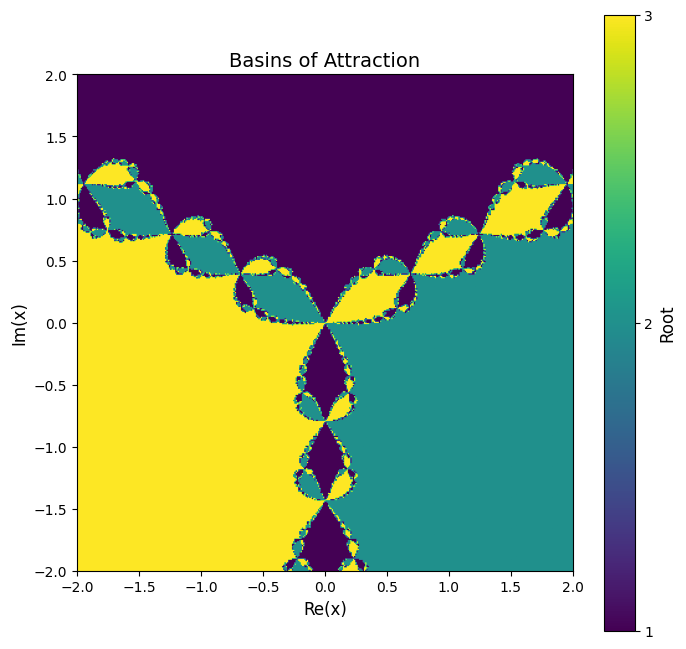

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivative
def f(x):
    return x**3 - 1

def f_prime(x):
    return 3*x**2

# Define the roots
roots = [np.exp(2j*np.pi*k/3) for k in range(3)]

# Define the grid of initial conditions in the complex plane
real_vals = np.linspace(-2, 2, 400)
imag_vals = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(real_vals, imag_vals)
initial_conditions = X + 1j*Y

# Initialize the grid for colors
colors = np.zeros_like(initial_conditions, dtype=int)

# Perform Newton's iteration for each initial condition
for i in range(len(real_vals)):
    for j in range(len(imag_vals)):
        x0 = initial_conditions[i, j]
        x = x0
        for _ in range(30):  # Maximum number of iterations
            x_new = x - f(x) / f_prime(x)
            if np.abs(x_new - x) < 1e-6:
                break
            x = x_new

        # Assign a color based on the root the iteration converges to
        for k in range(3):
            if np.abs(x - roots[k]) < 1e-2:
                colors[i, j] = k+1
                break

# Plot the basins of attraction
plt.figure(figsize=(8, 8))
plt.imshow(colors.T, origin='lower', extent=(-2, 2, -2, 2),
           cmap=plt.get_cmap('viridis'), vmin=1, vmax=3)

# Add colorbar and labels
cbar = plt.colorbar(ticks=[1, 2, 3])
cbar.set_label('Root', fontsize=12)
plt.xlabel('Re(x)', fontsize=12)
plt.ylabel('Im(x)', fontsize=12)
plt.title("Basins of Attraction", fontsize=14)

# Show the plot
plt.show()